<a href="https://colab.research.google.com/github/AbdulMoaizz/Image-Classification/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Customer Churn in Telecommunication

In [ ]:
import pandas as pd #importing pandas library

In [ ]:
df=pd.read_csv("telecom_customer_churn.csv")#reading .csv file and converting to dataframe

In [ ]:
df.head()#printing top 5 rows of the dataframe

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.info()#information of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
#filter the data frame for churned customers
churned_data = df[df['Customer Status'] == 'Churned']

In [ ]:
churned_data.shape

(1869, 38)

In [ ]:
df1=churned_data.describe()#statistical analysis of the dataframe
df1.transpose()#converting rows to columns and columns to rows for better readability

,count,mean,std,min,25%,50%,75%,max
Age,1869.0,49.735688,17.604893,19.000000,35.000000,50.000000,65.000000,80.000000
Number of Dependents,1869.0,0.118245,0.549902,0.000000,0.000000,0.000000,0.000000,7.000000
Zip Code,1869.0,93435.752809,1823.231029,90001.000000,92117.000000,93292.000000,95258.000000,96150.000000
Latitude,1869.0,36.026801,2.497264,32.555828,33.890046,35.490705,38.055562,41.962127
Longitude,1869.0,-119.670474,2.149758,-124.301372,-121.719489,-119.285484,-117.810896,-115.191857
Number of Referrals,1869.0,0.521134,1.094667,0.000000,0.000000,0.000000,1.000000,9.000000
Tenure in Months,1869.0,17.979133,19.531123,1.000000,2.000000,10.000000,29.000000,72.000000
Avg Monthly Long Distance Charges,1699.0,25.485762,14.216563,1.020000,13.015000,25.770000,37.670000,49.980000
Avg Monthly GB Download,1756.0,23.602506,17.975205,2.000000,11.000000,20.000000,28.000000,85.000000
Monthly Charge,1869.0,73.347592,26.373764,-10.000000,55.300000,79.500000,94.200000,118.350000


Average age: 50.16
average number of dependents: 0.09
average total refunds:1.672
average total charges:1719
average of total revenue: 2221


# Data Preprocessing

In [ ]:
# Counting null values for each columns
nullCounts = churned_data.isnull().sum()

# Printing the number of the null values
print("No. of Null Values:")
print(nullCounts)

No. of Null Values:
Customer ID                            0
Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Zip Code                               0
Latitude                               0
Longitude                              0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    170
Multiple Lines                       170
Internet Service                       0
Internet Type                        113
Avg Monthly GB Download              113
Online Security                      113
Online Backup                        113
Device Protection Plan               113
Premium Tech Support                 113
Streaming TV                         113
Streaming Movies                     

In [ ]:
# Checking the data types of each columns
columnDataTypes = churned_data.dtypes

# Printing the data types of each columns
print("Data Types of each Columns:")
print(columnDataTypes)

Data Types of each Columns:
Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support       

In [ ]:
# List of unnecessary columns
unnecessaryColumns = ["Customer ID", "City", "Zip Code", "Latitude", "Longitude"]

# Dropping the unnecessary columns
churned_data = churned_data.drop(columns=unnecessaryColumns)


In [ ]:
#one hot encoding
churned_data_encoded = pd.get_dummies(churned_data)
churned_data_encoded.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
2,50,0,0,4,33.65,30.0,73.9,280.85,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,75,0,3,3,7.38,11.0,83.9,267.40,0.0,0,...,0,0,0,0,1,0,0,0,0,0
18,79,0,0,45,10.67,17.0,62.7,2791.50,0.0,0,...,0,1,0,0,0,0,0,0,0,0
19,67,0,0,1,NaN,9.0,25.1,25.10,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#list of columns
churned_data_encoded.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Offer_None',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Internet Service_Yes', 'Internet Type_Cable', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
   

In [ ]:
churned_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7039
Data columns (total 81 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1869 non-null   int64  
 1   Number of Dependents                                    1869 non-null   int64  
 2   Number of Referrals                                     1869 non-null   int64  
 3   Tenure in Months                                        1869 non-null   int64  
 4   Avg Monthly Long Distance Charges                       1699 non-null   float64
 5   Avg Monthly GB Download                                 1756 non-null   float64
 6   Monthly Charge                                          1869 non-null   float64
 7   Total Charges                                           1869 non-null   float64
 8   Total Refunds                         

In [ ]:
# counting null values
churned_data_encoded.isnull().sum()

Age                                                0
Number of Dependents                               0
Number of Referrals                                0
Tenure in Months                                   0
Avg Monthly Long Distance Charges                170
                                                ... 
Churn Reason_Poor expertise of online support      0
Churn Reason_Poor expertise of phone support       0
Churn Reason_Price too high                        0
Churn Reason_Product dissatisfaction               0
Churn Reason_Service dissatisfaction               0
Length: 81, dtype: int64

In [ ]:
#replacing nan with 0
churned_data_encoded.fillna(0, inplace=True)

In [ ]:
#confirming the not null values
churned_data_encoded.isnull().sum()

Age                                              0
Number of Dependents                             0
Number of Referrals                              0
Tenure in Months                                 0
Avg Monthly Long Distance Charges                0
                                                ..
Churn Reason_Poor expertise of online support    0
Churn Reason_Poor expertise of phone support     0
Churn Reason_Price too high                      0
Churn Reason_Product dissatisfaction             0
Churn Reason_Service dissatisfaction             0
Length: 81, dtype: int64

In [ ]:
#identification of dummy trap variables
#Calculate Correlation Matrix
correlation_matrix = churned_data_encoded.corr()

#Identify High Correlations
high_correlation_pairs = []
threshold = 0.8  # Adjust threshold as needed

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print high correlation pairs
for pair in high_correlation_pairs:
    print("High correlation between:", pair[0], "and", pair[1])

High correlation between: Tenure in Months and Total Charges
High correlation between: Tenure in Months and Total Revenue
High correlation between: Total Charges and Total Revenue
High correlation between: Total Long Distance Charges and Total Revenue
High correlation between: Gender_Female and Gender_Male
High correlation between: Married_No and Married_Yes
High correlation between: Phone Service_No and Phone Service_Yes
High correlation between: Multiple Lines_No and Multiple Lines_Yes
High correlation between: Internet Service_No and Internet Service_Yes
High correlation between: Online Security_No and Online Security_Yes
High correlation between: Online Backup_No and Online Backup_Yes
High correlation between: Device Protection Plan_No and Device Protection Plan_Yes
High correlation between: Premium Tech Support_No and Premium Tech Support_Yes
High correlation between: Streaming TV_No and Streaming TV_Yes
High correlation between: Streaming Movies_No and Streaming Movies_Yes
High c

In [ ]:
#removing dummy trap variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Remove Dummy Variable Trap Variables
for pair in high_correlation_pairs:
    # Drop one variable from each pair
    if pair[0] in churned_data_encoded.columns:
        churned_data_encoded.drop(columns=[pair[0]], inplace=True)

# Print the updated list of columns after removing variables causing dummy variable trap
print("Columns after removing variables causing dummy variable trap:")
print(churned_data_encoded.columns)
churned_data_encoded.info()
cleaned_data=churned_data_encoded

Columns after removing variables causing dummy variable trap:
Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges',
       'Total Revenue', 'Gender_Male', 'Married_Yes', 'Offer_None',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Yes', 'Internet Type_Cable', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_Yes', 'Online Backup_Yes',
       'Device Protection Plan_Yes', 'Premium Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Customer Status_Churned',
       'Churn Category_Competitor'

# Exploratory Data Analysis

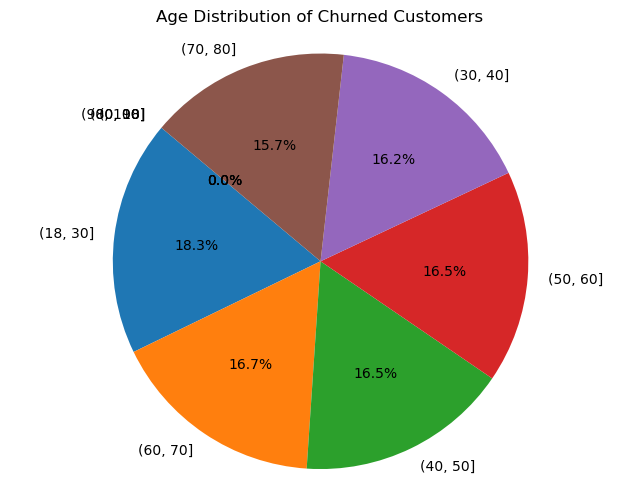

In [ ]:
import matplotlib.pyplot as plt

# Filter data for churned customers
#churned_data = cleaned_data['Customer Status_Churned']

# Define age groups or age ranges
age_groups = pd.cut(cleaned_data['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100])

# Calculate the distribution of age groups within churned customers
age_distribution = age_groups.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution of Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Mostly customers of age range between 18 and 30 churn the network

## Gender Distribution of Churned Customers

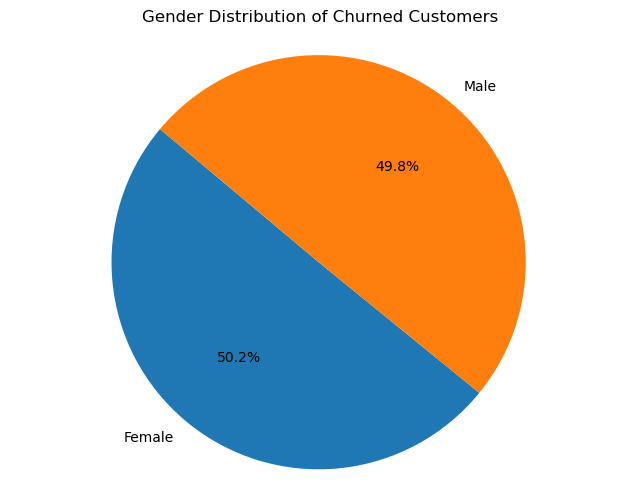

In [ ]:
import matplotlib.pyplot as plt

# Filter data for churned customers

custom_labels = ['Female', 'Male']
# Calculate the distribution of genders within churned customers
gender_distribution = cleaned_data['Gender_Male'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Mostly female churn the network

# Values of different columns corresponding to churned customers

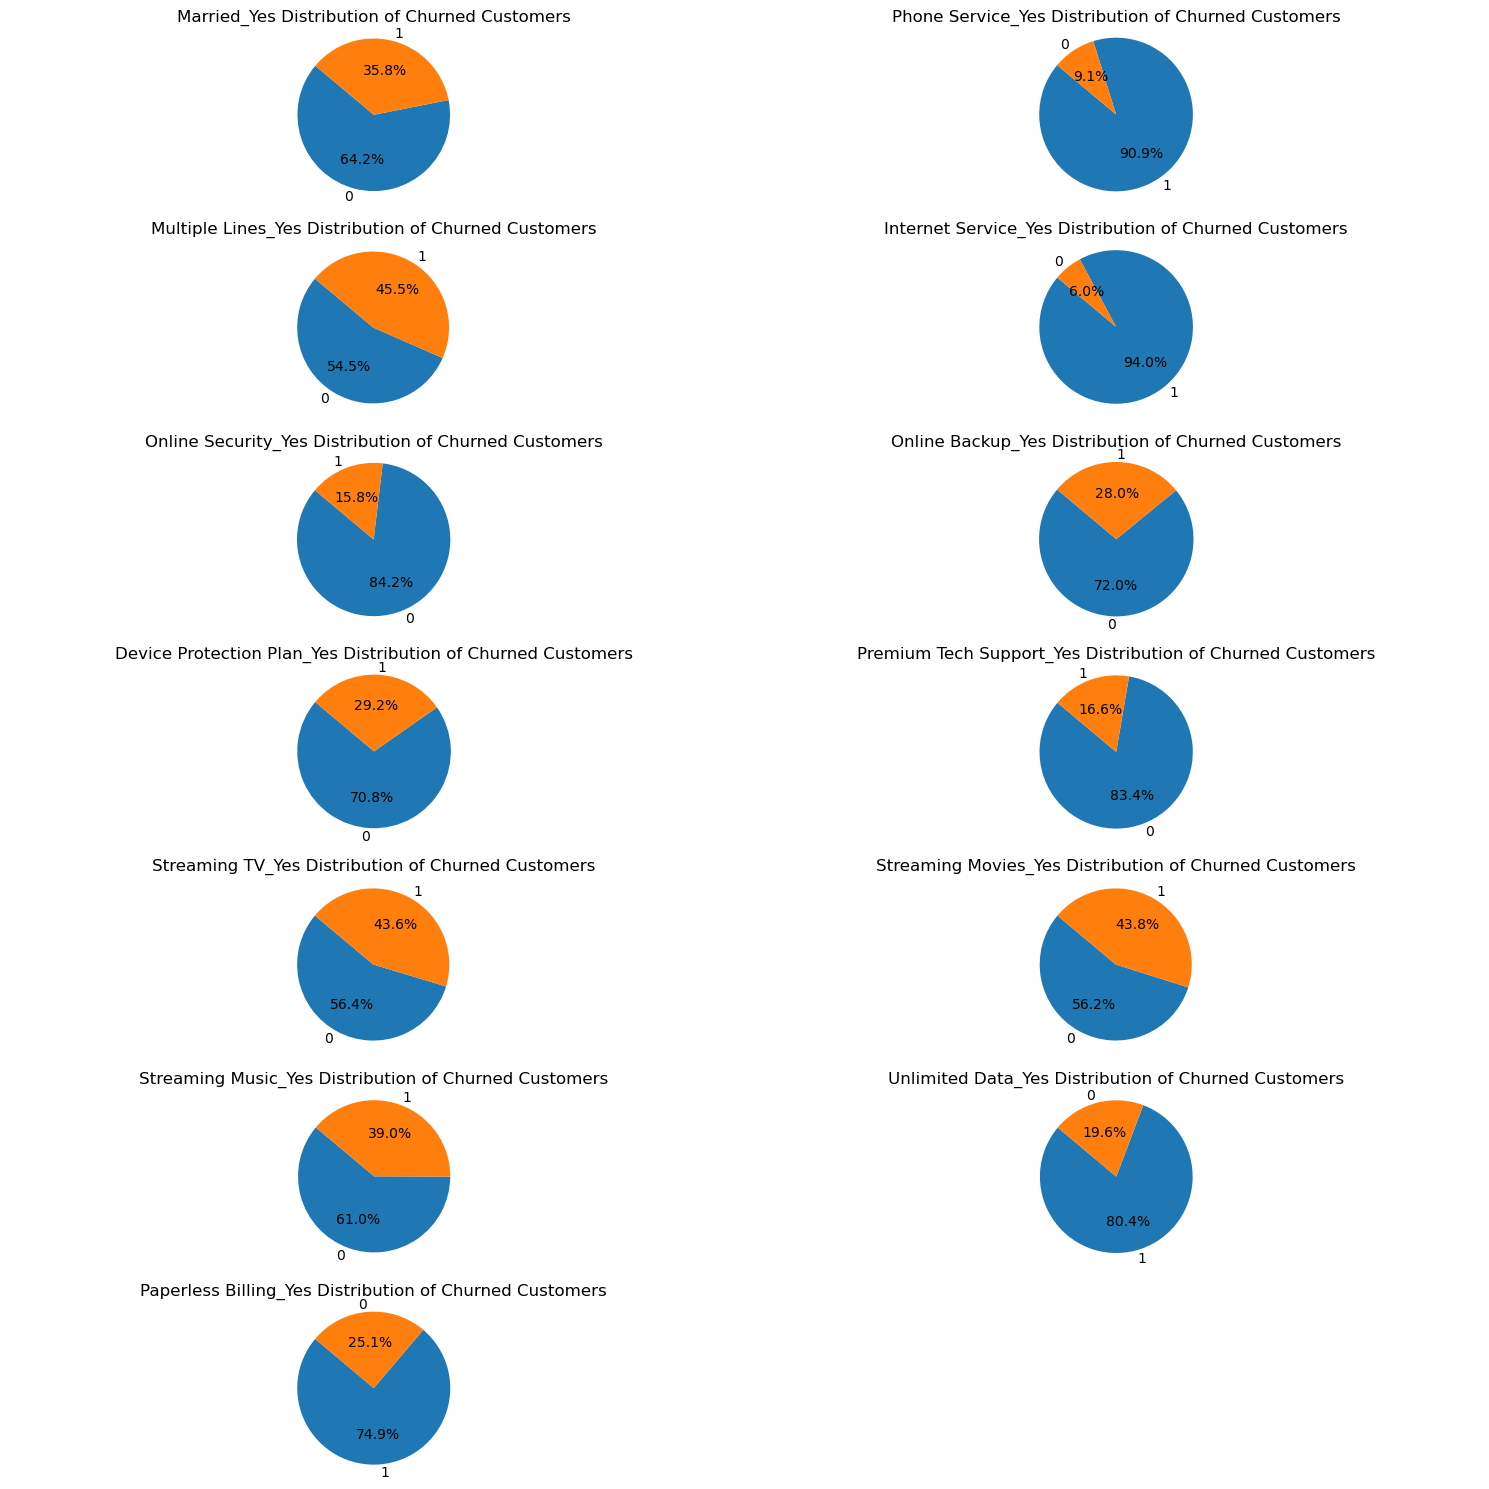

In [ ]:
import matplotlib.pyplot as plot

# Defining the list of columns for which we want to create pie charts
columns = ['Married_Yes', 'Phone Service_Yes', 'Multiple Lines_Yes','Internet Service_Yes', 'Online Security_Yes','Online Backup_Yes','Device Protection Plan_Yes','Premium Tech Support_Yes','Streaming TV_Yes','Streaming Movies_Yes','Streaming Music_Yes','Unlimited Data_Yes','Paperless Billing_Yes'
  ]

# Calculating the number of rows and columns for subplotting
cols = 2
rows = (len(columns) + cols - 1) // cols

# Creating subplots
fig, axes = plot.subplots(rows, cols, figsize=(15, 15))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Iterating over each column and create a pie chart
for i, column in enumerate(columns):
    # Calculating the value counts for each column
    column_distribution = cleaned_data[column].value_counts()

    # Plotting the pie chart
    ax = axes[i]
    ax.pie(column_distribution, labels=column_distribution.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{column} Distribution of Churned Customers')
    ax.axis('equal')  # Equal aspect ratio ensuring that each pie is drawn as a circle.

# Hiding the empty subplots
for i in range(len(columns), rows * cols):
    fig.delaxes(axes[i])

# Adjusting layout
plot.tight_layout()

# Showing the plots
plot.show()


- Customers who are not married, mostly churn the network
- customers who have phone service, mostly churn the network
- Customers with out multiple line distribution, mostly churn the network
- customers with internet services, mostly churn the network
- customer without online security, mostly churn the network
- customers without online backup , mostly churn the network
- customers without device protection plan, mostly churn the network
- customers without premium tech support , mostly churn the network
- customers without streaming tv, mostly churn the network
- customers without streaming movies , mostly churn the network
- customers without streaming music , mostly churn the network
- customers with unlimited daat , mostly churn the network
- customers with paperless billing, mostly churn the network

# Impact of Avg Monthly Long Distance Charges on CHURNING

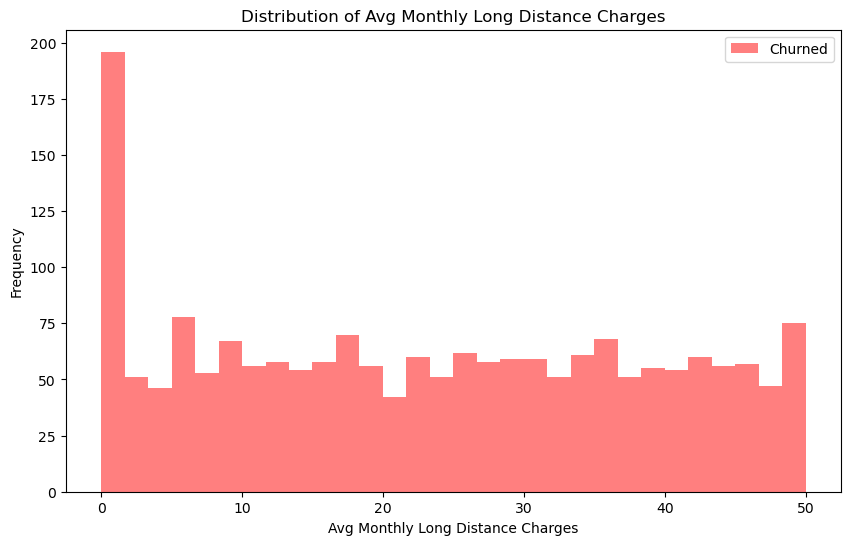

In [ ]:
plot.figure(figsize=(10, 6))
plot.hist(cleaned_data['Avg Monthly Long Distance Charges'], bins=30, alpha=0.5, color='red', label='Churned')
plot.xlabel('Avg Monthly Long Distance Charges')
plot.ylabel('Frequency')
plot.title('Distribution of Avg Monthly Long Distance Charges')
plot.legend()
plot.show()

It seems there is no effect of avg long distance monthly charges on churning because it is same for all ranges

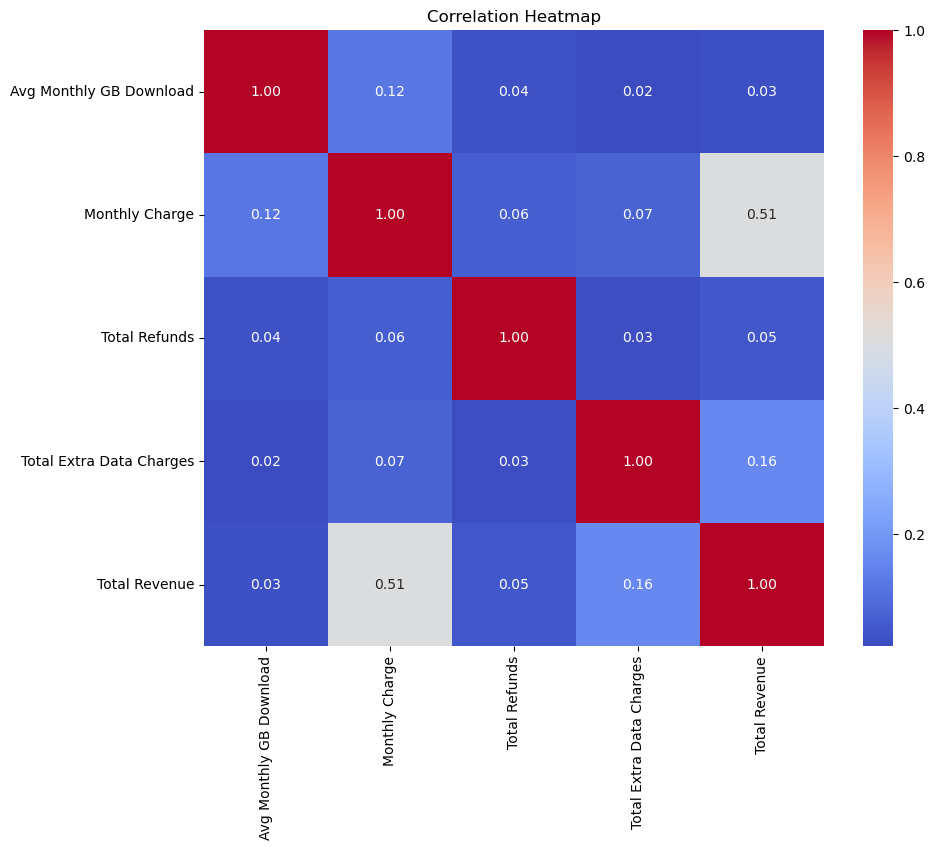

                                                    Age  Number of Dependents  \
Age                                            1.000000             -0.059035   
Number of Dependents                          -0.059035              1.000000   
Number of Referrals                            0.017457              0.030085   
Tenure in Months                               0.063403             -0.090187   
Avg Monthly Long Distance Charges             -0.000661             -0.049035   
...                                                 ...                   ...   
Churn Reason_Poor expertise of online support  0.014328             -0.020313   
Churn Reason_Poor expertise of phone support  -0.031145             -0.005105   
Churn Reason_Price too high                    0.022896             -0.001086   
Churn Reason_Product dissatisfaction           0.011526             -0.015204   
Churn Reason_Service dissatisfaction           0.014933              0.083859   

                           

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choosing the Interested columns
interestedColumns = ['Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Revenue']

# Filtering the data to include only non-null values
selectedData = cleaned_data[interestedColumns]

# Calculating the correlation matrix
correlationMatrix = selectedData.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print(correlation_matrix)


- There is a positive correlation(0.51) between total revenue and monthly chrages that means monthly chrgaes increase the total chages increases
- There is a weak positive correlation(0.05) between total revenue and Total refunds
- There is a weak positive correlation(0.03) between Average Monthly Gb download and Total refunds
- There is a moderate positive correlation(0.16) between total revenue and total extra chrages that means total extra chrgaes increase the total revenue also increases

# Relation of offers type to churning

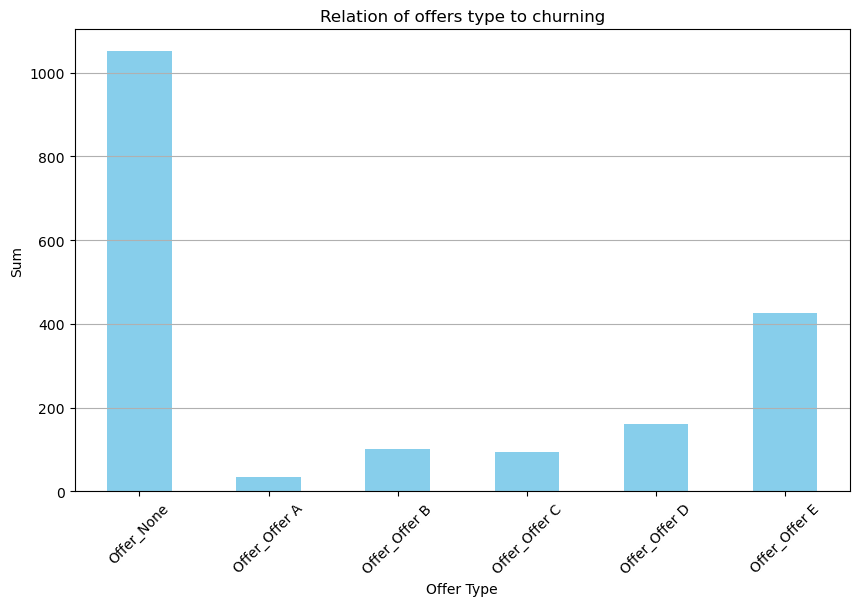

In [ ]:
# Selecting the columns representing different offer types
offer_columns = ['Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E']

# Calculating the sum of each offer type
offer_sums = cleaned_data[offer_columns].sum()

# Plotting the bar chart
plot.figure(figsize=(10, 6))
offer_sums.plot(kind='bar', color='skyblue')
plot.title('Relation of offers type to churning')
plot.xlabel('Offer Type')
plot.ylabel('Sum')
plot.xticks(rotation=45)  # Rotate x-axis labels for better readability
plot.grid(axis='y')  # Add gridlines on y-axis
plot.show()


Customers with no offer mostly churn the network

# Relation of internet type to churning

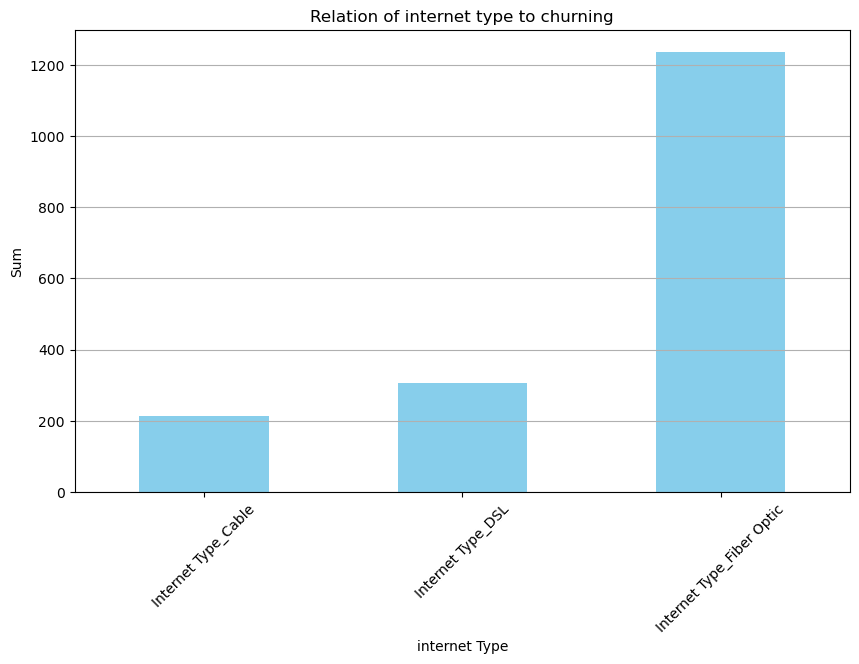

In [ ]:
# Selecting the columns representing different internet types
interested_columns = ['Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic']

# Calculating the sum of each internet type
sums = cleaned_data[interested_columns].sum()

# Plotting the bar chart
plot.figure(figsize=(10, 6))
sums.plot(kind='bar', color='skyblue')
plot.title('Relation of internet type to churning')
plot.xlabel('internet Type')
plot.ylabel('Sum')
plot.xticks(rotation=45)  # Rotate x-axis labels for better readability
plot.grid(axis='y')  # Add gridlines on y-axis
plot.show()

Customers with fibre optic type internet mostly churn the network

# Relation of payment type to churning

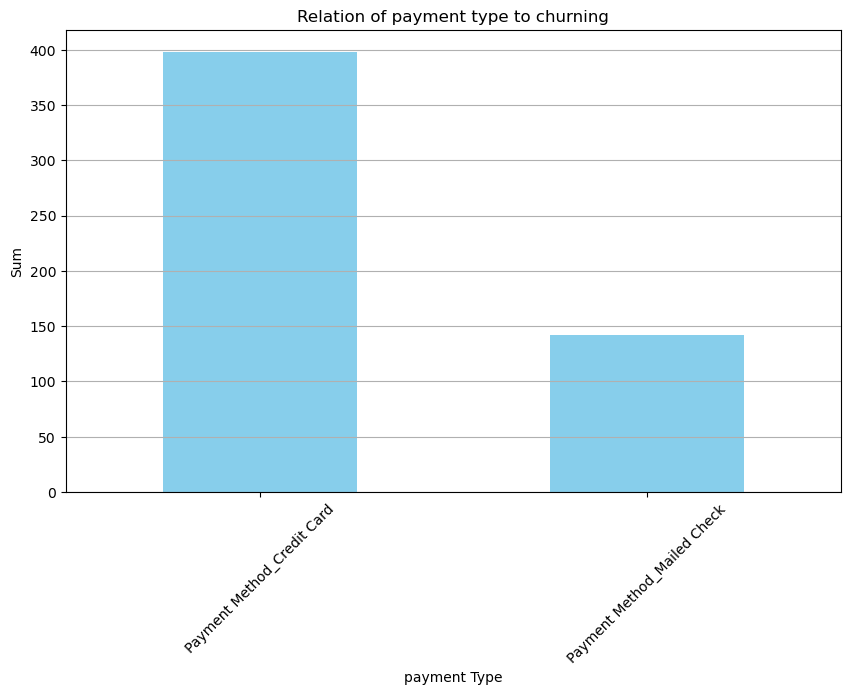

In [ ]:
# Selecting the columns representing different payment types
interested_columns = ['Payment Method_Credit Card', 'Payment Method_Mailed Check']

# Calculating the sum of each payment type
sums = cleaned_data[interested_columns].sum()
# Plotting the bar chart
plot.figure(figsize=(10, 6))
sums.plot(kind='bar', color='skyblue')
plot.title('Relation of payment type to churning')
plot.xlabel('payment Type')
plot.ylabel('Sum')
plot.xticks(rotation=45)  # Rotate x-axis labels for better readability
plot.grid(axis='y')  # Add gridlines on y-axis
plot.show()


Customers who pay by credit card mostly churning

# Relation of category to churning

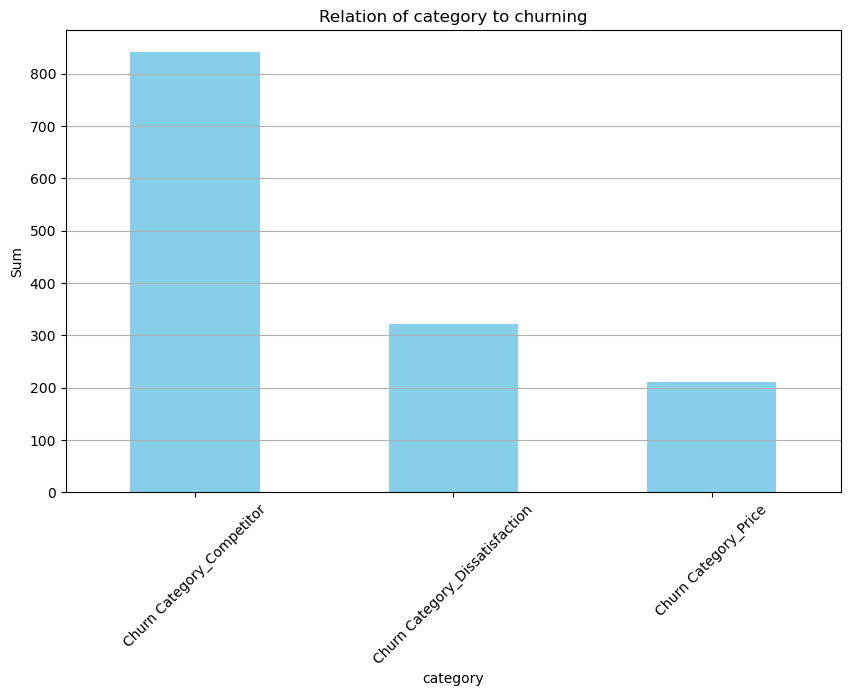

In [ ]:
# Selecting the columns representing different categories
categories = ['Churn Category_Competitor', 'Churn Category_Dissatisfaction', 'Churn Category_Price']

# Calculating the sum of each category
sums = cleaned_data[categories].sum()
# Plotting the bar chart
plot.figure(figsize=(10, 6))
sums.plot(kind='bar', color='skyblue')
plot.title('Relation of category to churning')
plot.xlabel('category')
plot.ylabel('Sum')
plot.xticks(rotation=45)  # Rotate x-axis labels for better readability
plot.grid(axis='y')  # Add gridlines on y-axis
plot.show()




Customers mostly churn due to competition

# Reason of churning

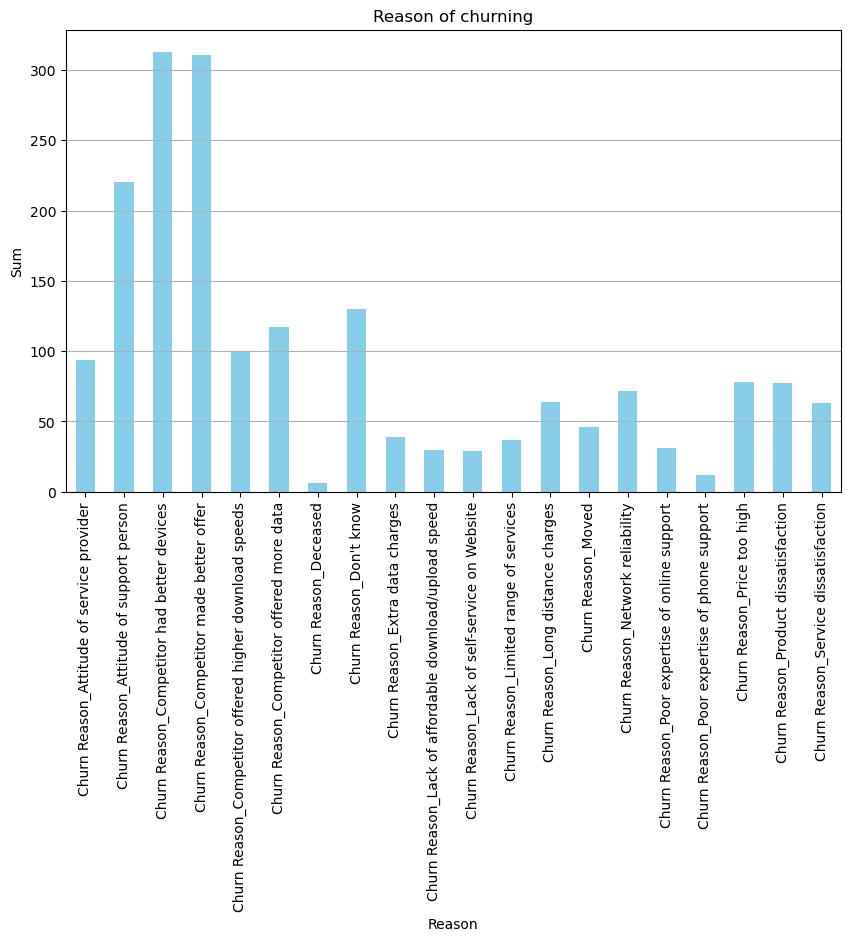

In [ ]:
# Selecting the columns representing different resons
reasons = ['Churn Reason_Attitude of service provider',
    'Churn Reason_Attitude of support person',
    'Churn Reason_Competitor had better devices',
    'Churn Reason_Competitor made better offer',
    'Churn Reason_Competitor offered higher download speeds',
    'Churn Reason_Competitor offered more data',
    'Churn Reason_Deceased',
    "Churn Reason_Don't know",
    'Churn Reason_Extra data charges',
    'Churn Reason_Lack of affordable download/upload speed',
    'Churn Reason_Lack of self-service on Website',
    'Churn Reason_Limited range of services',
    'Churn Reason_Long distance charges',
    'Churn Reason_Moved',
    'Churn Reason_Network reliability',
    'Churn Reason_Poor expertise of online support',
    'Churn Reason_Poor expertise of phone support',
    'Churn Reason_Price too high',
    'Churn Reason_Product dissatisfaction',
    'Churn Reason_Service dissatisfaction']

# Calculating the sum of each reason type
interested_columns = cleaned_data[reasons].sum()
# Plotting the bar chart
plot.figure(figsize=(10, 6))
interested_columns.plot(kind='bar', color='skyblue')
plot.title('Reason of churning')
plot.xlabel('Reason')
plot.ylabel('Sum')
plot.xticks(rotation=90)  # Rotate x-axis labels for better readability
plot.grid(axis='y')  # Add gridlines on y-axis
plot.show()



customers mostly churn because competitior offers better device

# Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Importing Library for Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#importing library for random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#preparing dataframe for data modelling
# List of unnecessary columns

unnecessaryColumns = ["Customer ID", "City", "Zip Code", "Latitude", "Longitude","Payment Method"]
# Dropping the unnecessary columns
df_dropped = df.drop(columns=unnecessaryColumns)

# Replacing missing values with previous value
df_dropped.fillna(method='ffill', inplace=True)

# Encoding category variables
label_encoder = LabelEncoder()
for column in df_dropped.columns:
    if df_dropped[column].dtype == 'object':
        df_dropped[column] = label_encoder.fit_transform(df_dropped[column])

In [ ]:
# Splitting the data into x and y variables
x = df_dropped.drop(columns=['Customer Status'])#features
y = df_dropped['Customer Status']#target variables

In [ ]:

# Splitting the data into training set and testing sets at raio of 80% and 20% resp
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:

# Building Logistic Regression model
#object creation
logisticRegr = LogisticRegression()

# Training of the model
logisticRegr.fit(x_train, y_train)

# Make predictions on the testing data
prediction = logisticRegr.predict(x_test)

# Evaluating the model
accuracyScore = accuracy_score(y_test, prediction)
print("Accuracy Score of Logistic Regression:", accuracyScore)

# Printing the classification report
print(classification_report(y_test, prediction))


Accuracy Score of Logistic Regression: 0.7764371894960965
              precision    recall  f1-score   support

           0       0.60      0.50      0.55       373
           1       0.54      0.47      0.51        97
           2       0.85      0.92      0.88       939

    accuracy                           0.78      1409
   macro avg       0.66      0.63      0.64      1409
weighted avg       0.76      0.78      0.77      1409



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Building Random Forest Classifier
# Object Creation
classifier= RandomForestClassifier(random_state=42)



# Fitting the classifier model
classifier.fit(x_train, y_train)

# Predicting the the testing data
prediction = classifier.predict(x_test)

# Evaluating the model
accuracyScore = accuracy_score(y_test, prediction)
print("Accuracy Score of Random Forest Classifier:", accuracyScore)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, prediction))

Accuracy Score of Random Forest Classifier: 0.8346344925479063
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       373
           1       0.68      0.60      0.64        97
           2       0.88      0.95      0.91       939

    accuracy                           0.83      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.83      0.83      0.83      1409



random forest classifier is better